In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi,sqrt
from numpy import exp
from scipy.stats import norm

In [47]:
#param: theta, f, kappa
# rho = 2.1 
kappa_tilde = 1
f = 0.25
theta = 0.6



def Q_critic(list_x,f,theta,kappa_tilde): #x=w/w_mean
    
    w_mean = theta/f
    
    
    #--------------get B----------------------
    #1- Get M_tilde via Eq. (22)
    def p(eps):
        return f*eps + (1-eps)/2
    func = lambda x: np.sum([p(eps) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])
    M_tilde_initial_guess = 0.5
    M_tilde = fsolve(func, M_tilde_initial_guess)
    # Plot it
    absc = np.linspace(-0.5, 100, 10000)
    plt.plot(absc, [func(el) for el in absc])
    plt.xlabel("M_tilde")
    plt.ylabel("expression value")
    plt.grid()
    plt.show()
    print("The solution is M_tilde = %f" % M_tilde)
    print("at which the value of the expression is %f" % func(M_tilde))
    
    #2- Get tau_eps via Eq. (15)
    def tau(eps):
        return -kappa_tilde + eps*f*M_tilde
    
    #3- Get B via Eq. (27)
    func = lambda x: ((1+x**2)*H(x)-x*G(x))/H(x) - \
                    np.sum([(f*eps + (1-eps)/2) * H(eps) for eps in [-1,1]]) / \
                            np.sum([(f*eps + (1-eps)/2) * ((1+tau(eps)**2)* H(tau(eps)) - tau(eps)*G(tau(eps))) for eps in [-1,1]])
    B_initial_guess = 0.5
    B = fsolve(func, B_initial_guess)
    # Plot it
    absc = np.linspace(-0.5, 100, 10000)
    plt.plot(x, [func(el) for el in absc])
    plt.xlabel("B")
    plt.ylabel("expression value")
    plt.grid()
    plt.show()
    print("The solution is B = %f" % B)
    print("at which the value of the expression is %f" % func(B))
    
    #-----------------------------------------
    
    #Get w_s
    w_s = get_w_s(B)
    
    #Return Q(x) where x = w/w_mean
    return [H(-B) * (x==0) + 1/(sqrt(2*pi) * w_s) * exp(-1/(2* w_s**2) * (w_mean*x + B * w_s)**2) * (x>0) for x in list_x]

def get_w_s(B):
    return w_mean / (G(B) - B*H(B))
  
def H(x):
    return 1 - norm.cdf(x, loc=0, scale=1)

def G(x):
    return exp(-x**2/2)/sqrt(2*pi)


def Q_non_critic(alpha,list_x):
    #get Q_hat
    
    #Get q_hat
    
    #Get M_hat
    return

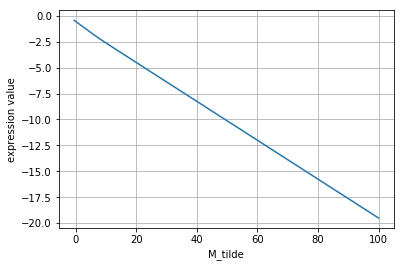

The solution is M_tilde = -2.774394
at which the value of the expression is -0.000000


/home/vincent/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/home/vincent/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in double_scalars


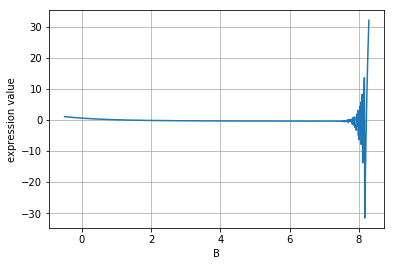

The solution is B = 1.146774
at which the value of the expression is 0.000000


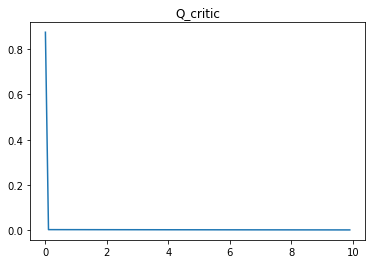

In [48]:
list_w = [i/10 for i in range(100)]
plt.plot(list_w,Q_critic(list_w,f,theta,kappa_tilde) )
plt.title('Q_critic')
plt.show()

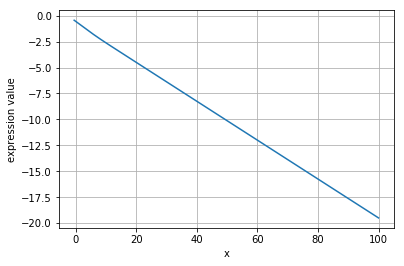

The solution is x = -2.774394
at which the value of the expression is -0.000000


In [23]:
# from scipy.optimize import fsolve

# func = lambda x: np.sum([(f*eps + (1-eps)/2) * eps * (G(-kappa_tilde + eps*f*x) - (-kappa_tilde + eps*f*x)*H(-kappa_tilde + eps*f*x))  for eps in [-1,1]])


# # Plot it
# x = np.linspace(-0.5, 100, 10000)
# plt.plot(x, [func(el) for el in x])
# plt.xlabel("x")
# plt.ylabel("expression value")
# plt.grid()
# plt.show()

# # Use the numerical solver to find the roots

# x_initial_guess = 0.5
# x_solution = fsolve(func, x_initial_guess)

# print("The solution is x = %f" % x_solution)
# print("at which the value of the expression is %f" % func(x_solution))